In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
from sklearn.metrics import r2_score
import scipy as sp

In [2]:
#ep = pd.read_csv("gtdb-rs202.evolpaths.merged.csv.gz")
ep = pd.read_csv("gtdb-rs202.evolpaths.nucleotide.csv.gz")
ep

comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
3       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
...                                   ...              ...              ...   
221125  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
221126  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
221127  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
221128  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
221129  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank    alphabet  ksize  scaled   jaccard  \
0         path1              genus  nucleotide     21       1  0.155515   
1         path1              genus  nucleotide     21    1000  0.160974   
2         path1              genus  nucleotide     21    2000  0.159965   
3         path1             family  nucleotide     21       1  0.000272   
4         path1             family  nucleotide     21    1000  0.000712   
...         ...                ...         ...    ...     ...       ...   
221125  path999             phylum  nucleotide     51    1000  0.000000   
221126  path999             phylum  nucleotide     51    2000  0.000000   
221127  path999       superkingdom  nucleotide     51       1  0.000000   
221128  path999       superkingdom  nucleotide     51    1000  0.000000   
221129  path999       superkingdom  nucleotide     51    2000  0.000000   

        max_containment  ...  total_query_fragments  EzAAIm AAI  \
0              0.401210  ...                  487.0    0.929069   
1              0.412247  ...                  487.0    0.929069   
2              0.417136  ...                  487.0    0.929069   
3              0.000828  ...                    NaN    0.631682   
4              0.002187  ...                    NaN    0.631682   
...                 ...  ...                    ...         ...   
221125         0.000000  ...                    NaN    0.507298   
221126         0.000000  ...                    NaN    0.507298   
221127         0.000000  ...                    NaN    0.485674   
221128         0.000000  ...                    NaN    0.485674   
221129         0.000000  ...                    NaN    0.485674   

        EzAAIm anchor CDS count  EzAAIm compare CDS count  \
0                          1965                      3590   
1                          1965                      3590   
2                          1965                      3590   
3                          1965                      3596   
4                          1965                      3596   
...                         ...                       ...   
221125                     3045                      2723   
221126                     3045                      2723   
221127                     3045                      3603   
221128                     3045                      3603   
221129                     3045                      3603   

        EzAAIm matched CDS count  EzAAIm proteome coverage  \
0                           1495                  0.538254   
1                           1495                  0.538254   
2                           1495                  0.538254   
3                            994                  0.357490   
4                            994                  0.357490   
...                          ...                       ...   
221125                       351                  0.121706   
221126                       351                  0.121706   
221127                       264                  0.079422   
221128            

In [3]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard ANI',
       'jani_low', 'jani_high', 'containA ANI', 'containAani_low',
       'containAani_high', 'containB ANI', 'containBani_low',
       'containBani_high', 'maxContain ANI', 'mcANI_low', 'mcANI_high',
       'jaccard_warning', 'alpha-ksize', 'compareM AAI', 'compareM_std_aai',
       'genes_in_anchor', 'genes_in_ref', 'orthologous_genes',
       'orthologous_fraction', 'ANIb ident', 'ANIb_coverage',
       'ANIb_aln_length', 'ANIb_sim_errors', 'ANIb_hadamard', 'ANIm ident',
       'ANIm_coverage', 'ANIm_aln_length', 'ANIm_sim_errors', 'ANIm_hadamard',
       'fastani ANI', 'num_bidirectional_fragment_mappings',
       'total_query_fragments', 'EzAAIm AAI', 'EzAAIm anchor CDS count',
       'EzAAIm compare CDS cou

In [4]:
dna_compare = ep[ep["ANIb ident"].notna()] # only grab comparisons we can work with
dna_compare

comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
18      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
19      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
...                                   ...              ...              ...   
221095  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221096  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221112  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221113  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221114  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   

           path lowest_common_rank    alphabet  ksize  scaled   jaccard  \
0         path1              genus  nucleotide     21       1  0.155515   
1         path1              genus  nucleotide     21    1000  0.160974   
2         path1              genus  nucleotide     21    2000  0.159965   
18        path1              genus  nucleotide     31       1  0.117970   
19        path1              genus  nucleotide     31    1000  0.115089   
...         ...                ...         ...    ...     ...       ...   
221095  path999              genus  nucleotide     31    1000  0.025155   
221096  path999              genus  nucleotide     31    2000  0.027450   
221112  path999              genus  nucleotide     51       1  0.011440   
221113  path999              genus  nucleotide     51    1000  0.011678   
221114  path999              genus  nucleotide     51    2000  0.010635   

        max_containment  ...  total_query_fragments  EzAAIm AAI  \
0              0.401210  ...                  487.0    0.929069   
1              0.412247  ...                  487.0    0.929069   
2              0.417136  ...                  487.0    0.929069   
18             0.315380  ...                  487.0    0.929069   
19             0.307900  ...                  487.0    0.929069   
...                 ...  ...                    ...         ...   
221095         0.052790  ...                 1130.0    0.917134   
221096         0.056604  ...                 1130.0    0.917134   
221112         0.023716  ...                 1130.0    0.917134   
221113         0.024665  ...                 1130.0    0.917134   
221114         0.022533  ...                 1130.0    0.917134   

        EzAAIm anchor CDS count  EzAAIm compare CDS count  \
0                          1965                      3590   
1                          1965                      3590   
2                          1965                      3590   
18                         1965                      3590   
19                         1965                      3590   
...                         ...                       ...   
221095                     3045                      3255   
221096                     3045                      3255   
221112                     3045                      3255   
221113                     3045                      3255   
221114                     3045                      3255   

        EzAAIm matched CDS count  EzAAIm proteome coverage  \
0                           1495                  0.538254   
1                           1495                  0.538254   
2                           1495                  0.538254   
18                          1495                  0.538254   
19                          1495                  0.538254   
...                          ...                       ...   
221095                      2466                  0.782857   
221096                      2466                  0.782857   
221112                      2466                  0.782857   
221113            

In [5]:
def ani_in_ci(row):
    row["ANIb in maxContain CI"] = False
    row["ANIm in maxContain CI"] = False
    row["ANIb in jaccard CI"] = False
    row["ANIm in jaccard CI"] = False
    anib = float(row["ANIb ident"])
    anim = float(row["ANIm ident"])
    mc_low = float(row["mcANI_low"])
    mc_high = float(row["mcANI_high"])
    if mc_low <= anib <= mc_high:
        row["ANIb in maxContain CI"] = True
    if mc_low <= anim <= mc_high:
        row["ANIm in maxContain CI"] = True
    jani_low = float(row["jani_low"])
    jani_high = float(row["jani_high"])
    if jani_low <= anib <= jani_high:
        row["ANIb in jaccard CI"] = True
    if jani_low <= anim <= jani_high:
        row["ANIm in jaccard CI"] = True
    return row

In [6]:
dna_compare = dna_compare.progress_apply(ani_in_ci, axis=1)
dna_compare

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30087/30087 [00:57<00:00, 522.60it/s]


comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
18      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
19      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
...                                   ...              ...              ...   
221095  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221096  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221112  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221113  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   
221114  GCA_002409405.1_x_GCF_011030385.1  GCA_002409405.1  GCF_011030385.1   

           path lowest_common_rank    alphabet  ksize  scaled   jaccard  \
0         path1              genus  nucleotide     21       1  0.155515   
1         path1              genus  nucleotide     21    1000  0.160974   
2         path1              genus  nucleotide     21    2000  0.159965   
18        path1              genus  nucleotide     31       1  0.117970   
19        path1              genus  nucleotide     31    1000  0.115089   
...         ...                ...         ...    ...     ...       ...   
221095  path999              genus  nucleotide     31    1000  0.025155   
221096  path999              genus  nucleotide     31    2000  0.027450   
221112  path999              genus  nucleotide     51       1  0.011440   
221113  path999              genus  nucleotide     51    1000  0.011678   
221114  path999              genus  nucleotide     51    2000  0.010635   

        max_containment  ...  EzAAIm matched CDS count  \
0              0.401210  ...                      1495   
1              0.412247  ...                      1495   
2              0.417136  ...                      1495   
18             0.315380  ...                      1495   
19             0.307900  ...                      1495   
...                 ...  ...                       ...   
221095         0.052790  ...                      2466   
221096         0.056604  ...                      2466   
221112         0.023716  ...                      2466   
221113         0.024665  ...                      2466   
221114         0.022533  ...                      2466   

        EzAAIm proteome coverage  EzAAIm id threshold  \
0                       0.538254                  0.4   
1                       0.538254                  0.4   
2                       0.538254                  0.4   
18                      0.538254                  0.4   
19                      0.538254                  0.4   
...                          ...                  ...   
221095                  0.782857                  0.4   
221096                  0.782857                  0.4   
221112                  0.782857                  0.4   
221113                  0.782857                  0.4   
221114                  0.782857                  0.4   

        EzAAIm coverage threshold  minContain ANI  avgContain ANI  \
0                             0.5        0.926776        0.942109   
1                             0.5        0.928150        0.943416   
2                             0.5        0.927531        0.943375   
18                            0.5        0.942327        0.952893   
19                            0.5        0.941682        0.952198   
...                           ...             ...             ...   
221095                        0.5        0.905350        0.907414   
221096                        0.5        0.908234        0.909880   
221112                        0.5        0.927581        0.928421   
221113                        0.5        0.927643        0.928810   
221114                        0.5  

## Check how many "true" ANI values are within our ANI CI

In [7]:
in_mcCI = dna_compare[dna_compare["ANIb in maxContain CI"] ==True]
in_mcCI.groupby(["scaled", "ksize"])[["ANIb in maxContain CI"]].count()

ANIb in maxContain CI
scaled ksize                       
1      21                         2
       51                         2
1000   21                       260
       31                        63
       51                         5
2000   21                       449
       31                        84
       51                         9

In [8]:
in_mcCI = dna_compare[dna_compare["ANIm in maxContain CI"] ==True]
in_mcCI.groupby(["scaled", "ksize"])[["ANIm in maxContain CI"]].count()

ANIm in maxContain CI
scaled ksize                       
1      21                        47
       31                         6
1000   21                       403
       31                        77
       51                        18
2000   21                       527
       31                       142
       51                        28

In [9]:
in_jCI = dna_compare[(dna_compare["ANIb in jaccard CI"] ==True)] # | (dna_compare["ANIm in jaccard CI"] ==True)]
in_jCI.groupby(["scaled", "ksize"])[["ANIb in jaccard CI"]].count()

ANIb in jaccard CI
scaled ksize                    
1      21                      5
       31                      1
1000   21                    355
       31                     84
       51                      6
2000   21                    560
       31                    103
       51                     13

In [10]:
in_jCI = dna_compare[(dna_compare["ANIm in jaccard CI"] ==True)] # | (dna_compare["ANIm in jaccard CI"] ==True)]
in_jCI.groupby(["scaled", "ksize"])[["ANIm in jaccard CI"]].count()

ANIm in jaccard CI
scaled ksize                    
1      21                     32
       31                     13
1000   21                    436
       31                    112
       51                     24
2000   21                    576
       31                    181
       51                     36

In [11]:
# how many true values per scaled?
#sDF_inCI.groupby("scaled").describe()
#dna_only.groupby(["scaled", "ksize"])[["ani_in_jaccard_ci"]].describe()

In [12]:
ep

comparison_name      anchor_name     compare_name  \
0       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2       GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
3       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4       GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
...                                   ...              ...              ...   
221125  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
221126  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
221127  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
221128  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
221129  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

           path lowest_common_rank    alphabet  ksize  scaled   jaccard  \
0         path1              genus  nucleotide     21       1  0.155515   
1         path1              genus  nucleotide     21    1000  0.160974   
2         path1              genus  nucleotide     21    2000  0.159965   
3         path1             family  nucleotide     21       1  0.000272   
4         path1             family  nucleotide     21    1000  0.000712   
...         ...                ...         ...    ...     ...       ...   
221125  path999             phylum  nucleotide     51    1000  0.000000   
221126  path999             phylum  nucleotide     51    2000  0.000000   
221127  path999       superkingdom  nucleotide     51       1  0.000000   
221128  path999       superkingdom  nucleotide     51    1000  0.000000   
221129  path999       superkingdom  nucleotide     51    2000  0.000000   

        max_containment  ...  total_query_fragments  EzAAIm AAI  \
0              0.401210  ...                  487.0    0.929069   
1              0.412247  ...                  487.0    0.929069   
2              0.417136  ...                  487.0    0.929069   
3              0.000828  ...                    NaN    0.631682   
4              0.002187  ...                    NaN    0.631682   
...                 ...  ...                    ...         ...   
221125         0.000000  ...                    NaN    0.507298   
221126         0.000000  ...                    NaN    0.507298   
221127         0.000000  ...                    NaN    0.485674   
221128         0.000000  ...                    NaN    0.485674   
221129         0.000000  ...                    NaN    0.485674   

        EzAAIm anchor CDS count  EzAAIm compare CDS count  \
0                          1965                      3590   
1                          1965                      3590   
2                          1965                      3590   
3                          1965                      3596   
4                          1965                      3596   
...                         ...                       ...   
221125                     3045                      2723   
221126                     3045                      2723   
221127                     3045                      3603   
221128                     3045                      3603   
221129                     3045                      3603   

        EzAAIm matched CDS count  EzAAIm proteome coverage  \
0                           1495                  0.538254   
1                           1495                  0.538254   
2                           1495                  0.538254   
3                            994                  0.357490   
4                            994                  0.357490   
...                          ...                       ...   
221125                       351                  0.121706   
221126                       351                  0.121706   
221127                       264                  0.079422   
221128            

In [13]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard ANI',
       'jani_low', 'jani_high', 'containA ANI', 'containAani_low',
       'containAani_high', 'containB ANI', 'containBani_low',
       'containBani_high', 'maxContain ANI', 'mcANI_low', 'mcANI_high',
       'jaccard_warning', 'alpha-ksize', 'compareM AAI', 'compareM_std_aai',
       'genes_in_anchor', 'genes_in_ref', 'orthologous_genes',
       'orthologous_fraction', 'ANIb ident', 'ANIb_coverage',
       'ANIb_aln_length', 'ANIb_sim_errors', 'ANIb_hadamard', 'ANIm ident',
       'ANIm_coverage', 'ANIm_aln_length', 'ANIm_sim_errors', 'ANIm_hadamard',
       'fastani ANI', 'num_bidirectional_fragment_mappings',
       'total_query_fragments', 'EzAAIm AAI', 'EzAAIm anchor CDS count',
       'EzAAIm compare CDS cou

In [14]:
compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   "compareM AAI", 
                    "ANIb ident", 
                    "ANIb_coverage"]

nucl_value_vars = ["jaccard ANI", "containA ANI", 
                   "containB ANI", "maxContain ANI", 
                   "minContain ANI", "avgContain ANI", 
                   "fastani ANI", "ANIm ident"]

In [15]:
melted=pd.melt(ep,id_vars= compare_id_vars,
                     value_vars=nucl_value_vars,
                     var_name='estimator', value_name='ANI')
melted

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
1769035  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769036  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769037  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
1769038  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
1769039  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name    alpha-ksize    alphabet  ksize  \
0        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
1        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
2        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
3        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
4        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
...                  ...              ...            ...         ...    ...   
1769035  GCA_002409405.1  GCA_003567135.1  nucleotide-51  nucleotide     51   
1769036  GCA_002409405.1  GCA_003567135.1  nucleotide-51  nucleotide     51   
1769037  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   
1769038  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   
1769039  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   

         scaled  compareM AAI  ANIb ident  ANIb_coverage    estimator  \
0             1        0.9242    0.937351       0.582294  jaccard ANI   
1          1000        0.9242    0.937351       0.582294  jaccard ANI   
2          2000        0.9242    0.937351       0.582294  jaccard ANI   
3             1        0.6116         NaN            NaN  jaccard ANI   
4          1000        0.6116         NaN            NaN  jaccard ANI   
...         ...           ...         ...            ...          ...   
1769035    1000        0.4496         NaN            NaN   ANIm ident   
1769036    2000        0.4496         NaN            NaN   ANIm ident   
1769037       1        0.4195         NaN            NaN   ANIm ident   
1769038    1000        0.4195         NaN            NaN   ANIm ident   
1769039    2000        0.4195         NaN            NaN   ANIm ident   

              ANI  
0        0.939417  
1        0.940750  
2        0.940508  
3        0.699089  
4        0.731858  
...           ...  
1769035       NaN  
1769036       NaN  
1769037       NaN  
1769038       NaN  
1769039       NaN  

[1769040 rows x 14 columns]

In [16]:
melted["ANIdiff"] = melted["ANI"] - melted['ANIb ident']
melted

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
1769035  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769036  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769037  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
1769038  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
1769039  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name    alpha-ksize    alphabet  ksize  \
0        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
1        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
2        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
3        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
4        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
...                  ...              ...            ...         ...    ...   
1769035  GCA_002409405.1  GCA_003567135.1  nucleotide-51  nucleotide     51   
1769036  GCA_002409405.1  GCA_003567135.1  nucleotide-51  nucleotide     51   
1769037  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   
1769038  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   
1769039  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   

         scaled  compareM AAI  ANIb ident  ANIb_coverage    estimator  \
0             1        0.9242    0.937351       0.582294  jaccard ANI   
1          1000        0.9242    0.937351       0.582294  jaccard ANI   
2          2000        0.9242    0.937351       0.582294  jaccard ANI   
3             1        0.6116         NaN            NaN  jaccard ANI   
4          1000        0.6116         NaN            NaN  jaccard ANI   
...         ...           ...         ...            ...          ...   
1769035    1000        0.4496         NaN            NaN   ANIm ident   
1769036    2000        0.4496         NaN            NaN   ANIm ident   
1769037       1        0.4195         NaN            NaN   ANIm ident   
1769038    1000        0.4195         NaN            NaN   ANIm ident   
1769039    2000        0.4195         NaN            NaN   ANIm ident   

              ANI   ANIdiff  
0        0.939417  0.002066  
1        0.940750  0.003400  
2        0.940508  0.003157  
3        0.699089       NaN  
4        0.731858       NaN  
...           ...       ...  
1769035       NaN       NaN  
1769036       NaN       NaN  
1769037       NaN       NaN  
1769038       NaN       NaN  
1769039       NaN       NaN  

[1769040 rows x 15 columns]

In [17]:
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

ani_colors = {"jaccard ANI":"#89bedc", "maxContain ANI":"#0b559f",
              "containA ANI":'#2b7bba', "compareM ANI":"#c44e52",
              "fastani ANI": "#c44e52", "containB ANI": "#74c476",
              "minContain ANI": "#006400", 'ANIb ident': "#A3623A",
              "avgContain ANI": "#399a8b", 'ANIm ident': "#B2622A",}

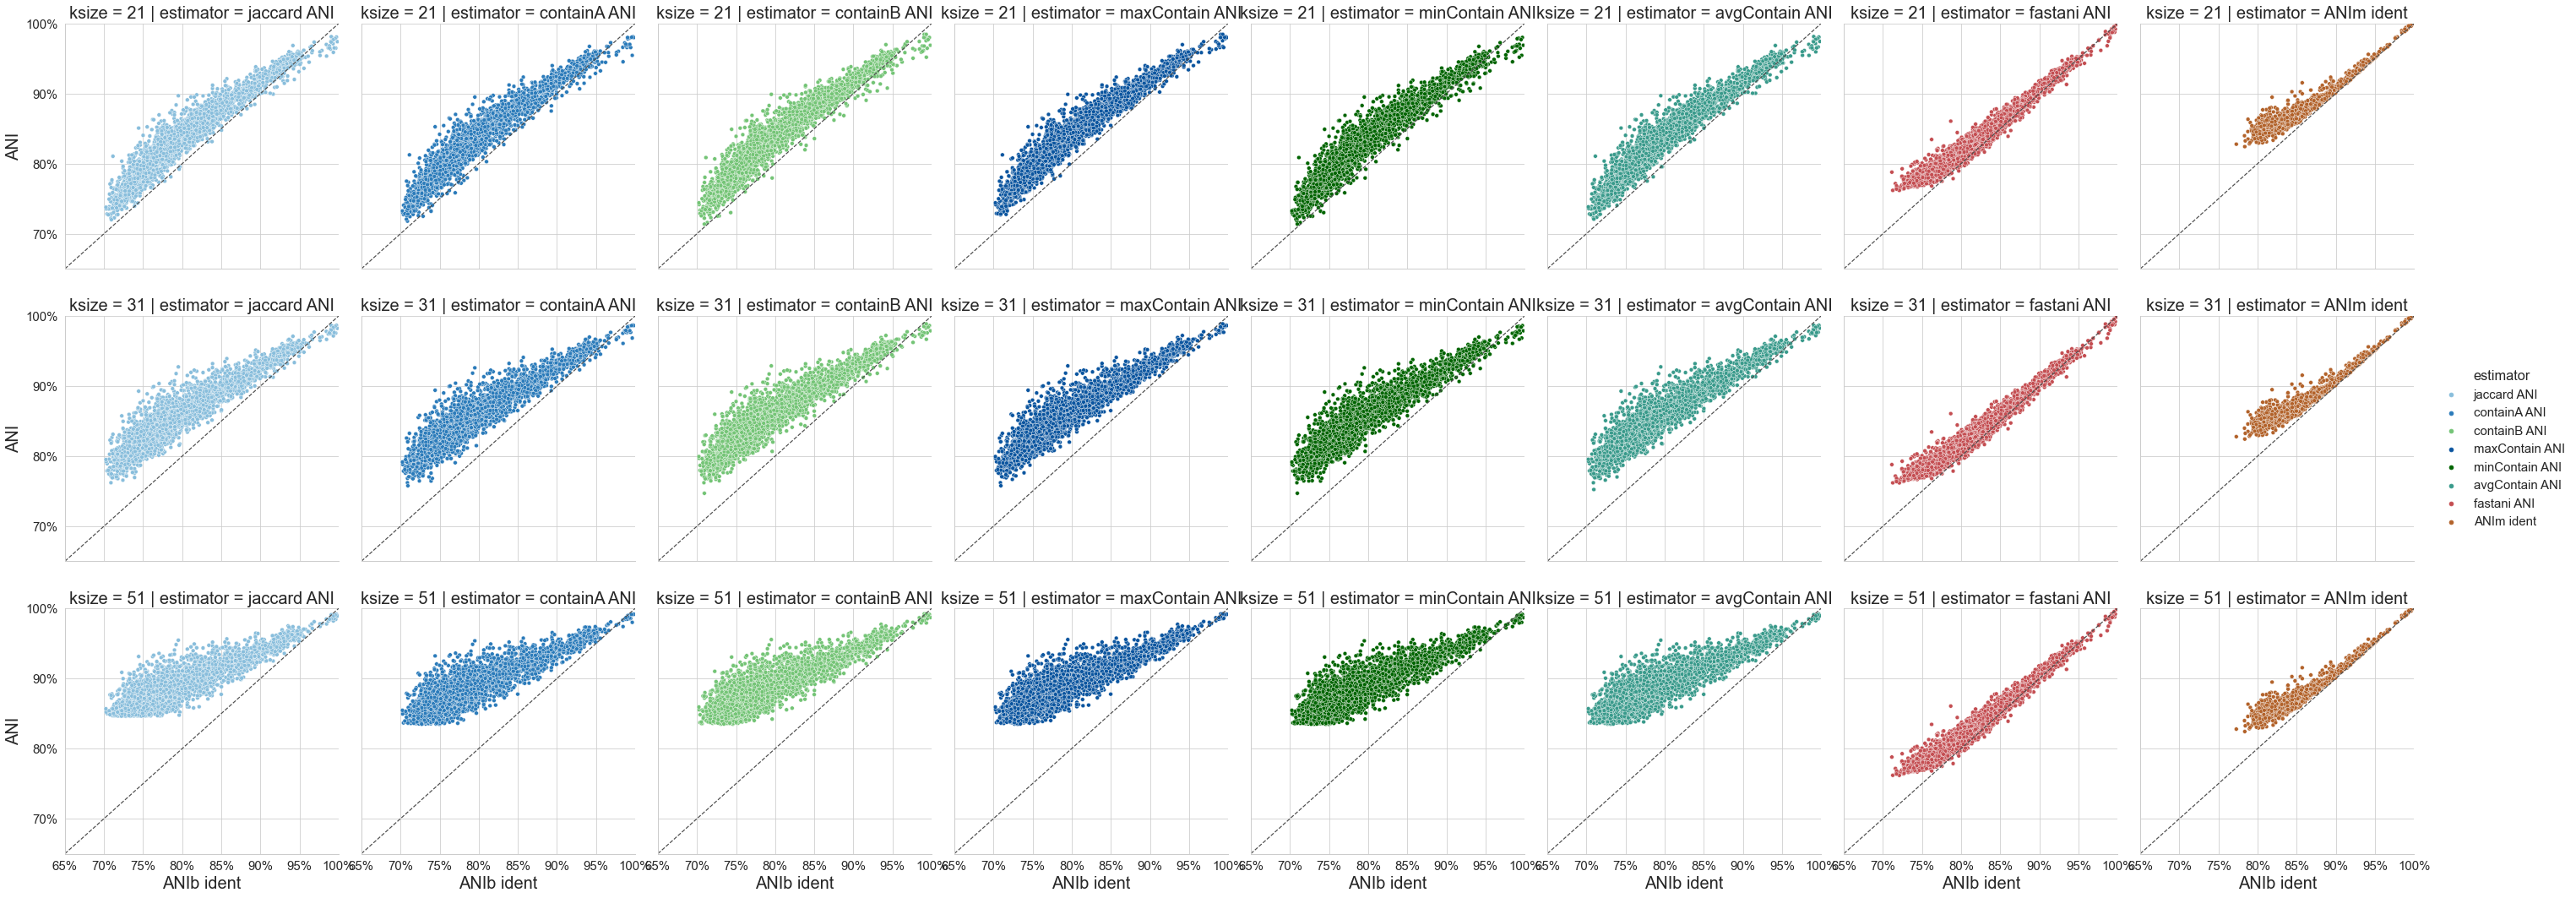

In [18]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=melted[melted["scaled"] == 1], 
                  x="ANIb ident", y="ANI", hue="estimator",col="estimator", row="ksize", palette=ani_colors)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #fig = g.get_figure()

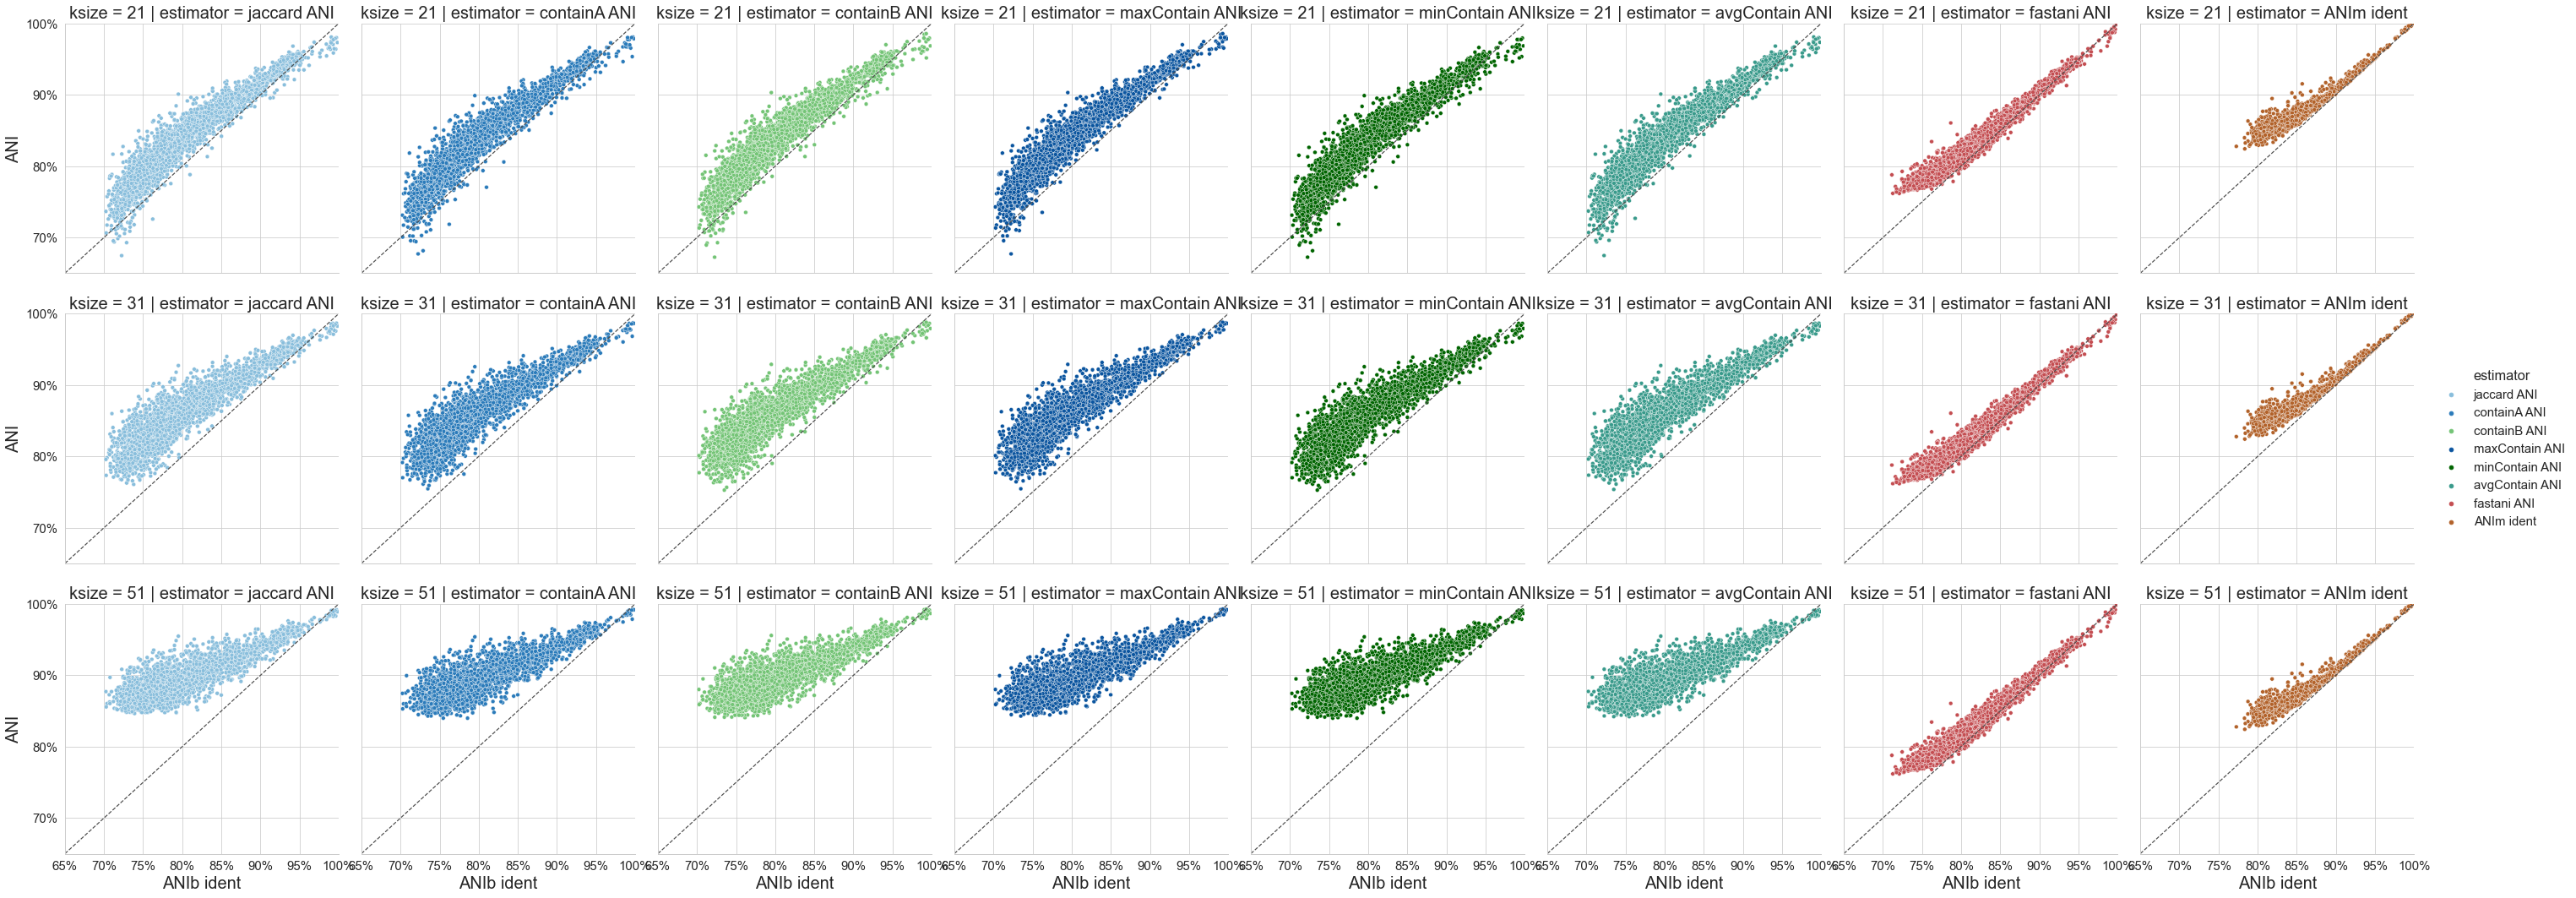

In [19]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=melted[melted["scaled"] == 1000], 
                  x="ANIb ident", y="ANI", hue="estimator",col="estimator", row="ksize", palette=ani_colors)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #fig = g.get_figure()

In [20]:
## subset estimators

sub = melted[melted["estimator"].isin(["ANIm ident", "fastani ANI", "jaccard ANI", "maxContain ANI", "avgContain ANI"])]
sub

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
4        GCA_004524385.1_x_GCA_011364975.1    path1             family   
...                                    ...      ...                ...   
1769035  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769036  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769037  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
1769038  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
1769039  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name    alpha-ksize    alphabet  ksize  \
0        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
1        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
2        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
3        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
4        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
...                  ...              ...            ...         ...    ...   
1769035  GCA_002409405.1  GCA_003567135.1  nucleotide-51  nucleotide     51   
1769036  GCA_002409405.1  GCA_003567135.1  nucleotide-51  nucleotide     51   
1769037  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   
1769038  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   
1769039  GCA_002409405.1  GCF_004319585.1  nucleotide-51  nucleotide     51   

         scaled  compareM AAI  ANIb ident  ANIb_coverage    estimator  \
0             1        0.9242    0.937351       0.582294  jaccard ANI   
1          1000        0.9242    0.937351       0.582294  jaccard ANI   
2          2000        0.9242    0.937351       0.582294  jaccard ANI   
3             1        0.6116         NaN            NaN  jaccard ANI   
4          1000        0.6116         NaN            NaN  jaccard ANI   
...         ...           ...         ...            ...          ...   
1769035    1000        0.4496         NaN            NaN   ANIm ident   
1769036    2000        0.4496         NaN            NaN   ANIm ident   
1769037       1        0.4195         NaN            NaN   ANIm ident   
1769038    1000        0.4195         NaN            NaN   ANIm ident   
1769039    2000        0.4195         NaN            NaN   ANIm ident   

              ANI   ANIdiff  
0        0.939417  0.002066  
1        0.940750  0.003400  
2        0.940508  0.003157  
3        0.699089       NaN  
4        0.731858       NaN  
...           ...       ...  
1769035       NaN       NaN  
1769036       NaN       NaN  
1769037       NaN       NaN  
1769038       NaN       NaN  
1769039       NaN       NaN  

[1105650 rows x 15 columns]

In [21]:
k21_scaled1 = sub[(sub["ksize"] == 21) & (sub["scaled"] == 1)]
k21_scaled1

comparison_name     path lowest_common_rank  \
0        GCA_004524385.1_x_GCA_004524535.1    path1              genus   
3        GCA_004524385.1_x_GCA_011364975.1    path1             family   
6        GCA_004524385.1_x_GCF_008000775.1    path1              order   
9        GCA_004524385.1_x_GCA_013375405.1    path1              class   
12       GCA_004524385.1_x_GCA_004524565.1    path1             phylum   
...                                    ...      ...                ...   
1768989  GCA_002409405.1_x_GCA_001899145.1  path999             family   
1768992  GCA_002409405.1_x_GCA_013042625.1  path999              order   
1768995  GCA_002409405.1_x_GCA_002317435.1  path999              class   
1768998  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
1769001  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

             anchor_name     compare_name    alpha-ksize    alphabet  ksize  \
0        GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
3        GCA_004524385.1  GCA_011364975.1  nucleotide-21  nucleotide     21   
6        GCA_004524385.1  GCF_008000775.1  nucleotide-21  nucleotide     21   
9        GCA_004524385.1  GCA_013375405.1  nucleotide-21  nucleotide     21   
12       GCA_004524385.1  GCA_004524565.1  nucleotide-21  nucleotide     21   
...                  ...              ...            ...         ...    ...   
1768989  GCA_002409405.1  GCA_001899145.1  nucleotide-21  nucleotide     21   
1768992  GCA_002409405.1  GCA_013042625.1  nucleotide-21  nucleotide     21   
1768995  GCA_002409405.1  GCA_002317435.1  nucleotide-21  nucleotide     21   
1768998  GCA_002409405.1  GCA_003567135.1  nucleotide-21  nucleotide     21   
1769001  GCA_002409405.1  GCF_004319585.1  nucleotide-21  nucleotide     21   

         scaled  compareM AAI  ANIb ident  ANIb_coverage    estimator  \
0             1        0.9242    0.937351       0.582294  jaccard ANI   
3             1        0.6116         NaN            NaN  jaccard ANI   
6             1        0.4561         NaN            NaN  jaccard ANI   
9             1        0.4572         NaN            NaN  jaccard ANI   
12            1        0.4077         NaN            NaN  jaccard ANI   
...         ...           ...         ...            ...          ...   
1768989       1        0.5983         NaN            NaN   ANIm ident   
1768992       1        0.5172         NaN            NaN   ANIm ident   
1768995       1        0.4829         NaN            NaN   ANIm ident   
1768998       1        0.4496         NaN            NaN   ANIm ident   
1769001       1        0.4195         NaN            NaN   ANIm ident   

              ANI   ANIdiff  
0        0.939417  0.002066  
3        0.699089       NaN  
6             NaN       NaN  
9             NaN       NaN  
12            NaN       NaN  
...           ...       ...  
1768989       NaN       NaN  
1768992       NaN       NaN  
1768995       NaN       NaN  
1768998       NaN       NaN  
1769001       NaN       NaN  

[122850 rows x 15 columns]

In [51]:
k21_scaled1000 = sub[(sub["ksize"] == 21) & (sub["scaled"] == 1000)]
k31_scaled1 = sub[(sub["ksize"] == 31) & (sub["scaled"] == 1)]
k51_scaled1 = sub[(sub["ksize"] == 51) & (sub["scaled"] == 1)]
k51_scaled1000 = sub[(sub["ksize"] == 51) & (sub["scaled"] == 1000)]
scaled1 = sub[sub["scaled"] == 1]




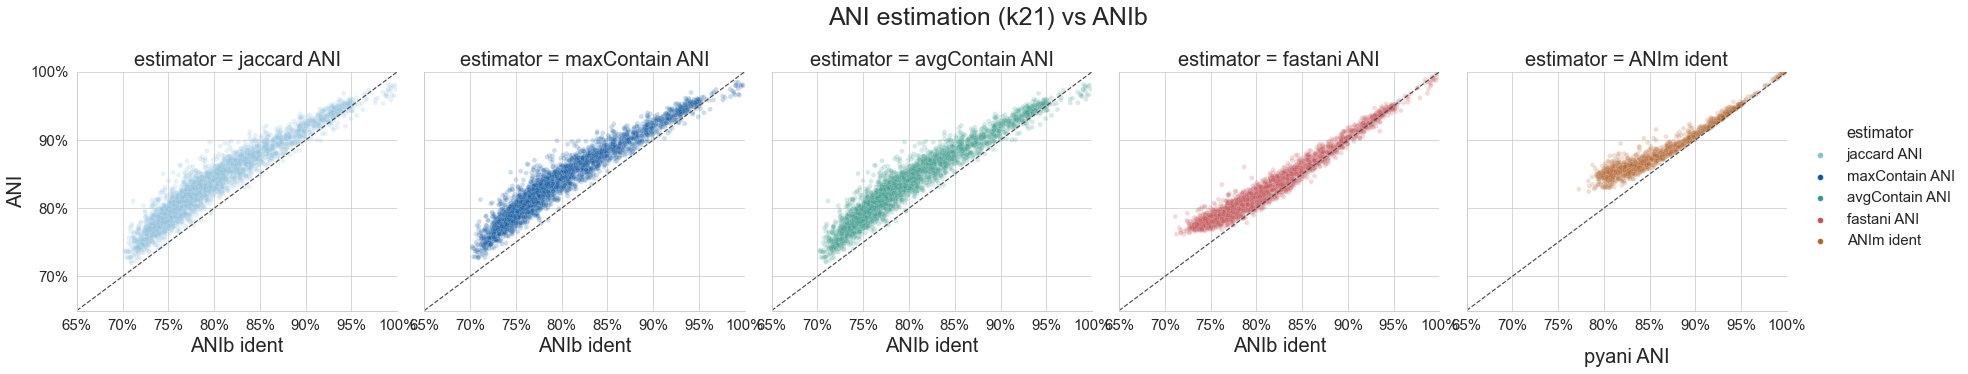

In [23]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k21_scaled1,x="ANIb ident", y="ANI", hue="estimator",col="estimator", palette=ani_colors, alpha=0.2)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    plt.xlabel("pyani ANI", size=20, labelpad=15)
    plt.ylabel("fastani ANI", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    fig.savefig("ANI-vs-ANIb.corr.k21.pdf",bbox_inches='tight')
    fig.savefig("ANI-vs-ANIb.corr.k21.png",bbox_inches='tight')



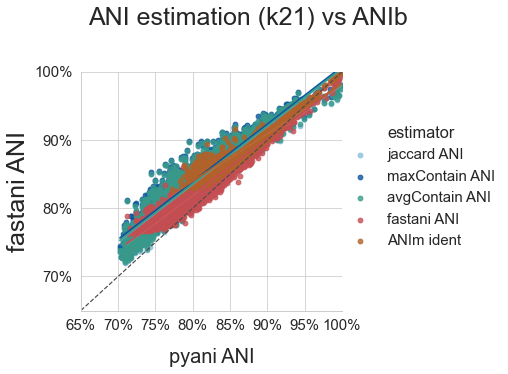

In [24]:
#g = sns.lmplot(
#    data=penguins,
#    x="bill_length_mm", y="bill_depth_mm", hue="species",
#    height=5
#)
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.lmplot(data=k21_scaled1,x="ANIb ident", y="ANI", hue="estimator", palette=ani_colors) #col="estimator",
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    plt.xlabel("pyani ANI", size=20, labelpad=15)
    plt.ylabel("fastani ANI", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k21.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k21.png",bbox_inches='tight')




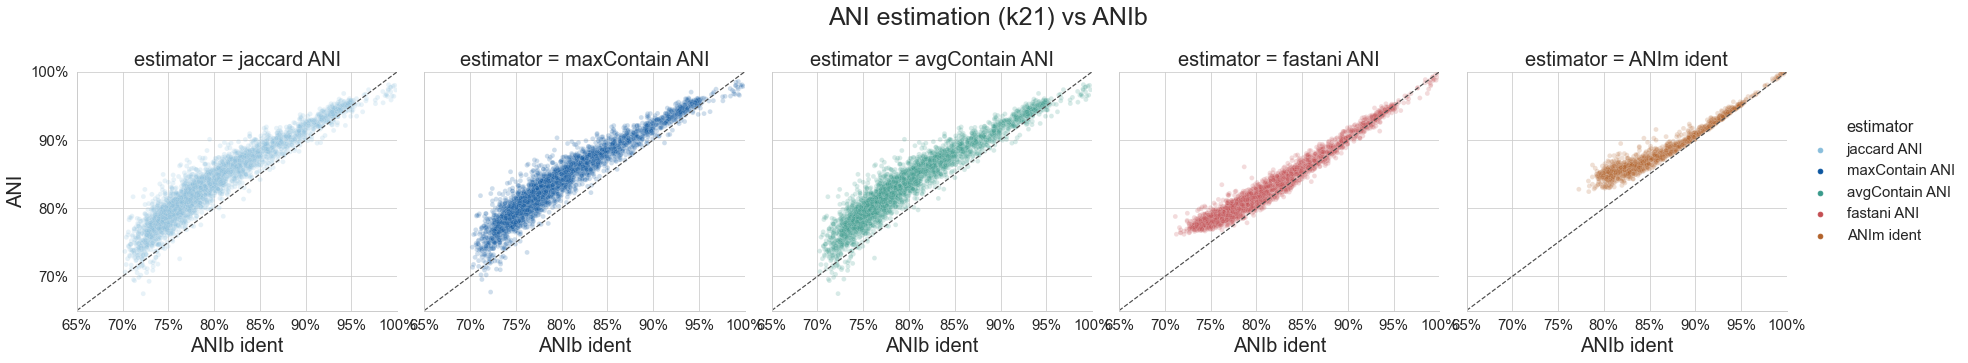

In [25]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k21_scaled1000,x="ANIb ident", y="ANI", hue="estimator",col="estimator", palette=ani_colors, alpha=0.2)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #plt.xlabel("pyani ANI", size=20, labelpad=15)
    #plt.ylabel("fastani ANI", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    fig.savefig("ANI-vs-ANIb.corr.k21.scaled1000.pdf",bbox_inches='tight')
    fig.savefig("ANI-vs-ANIb.corr.k21.scaled1000.png",bbox_inches='tight')



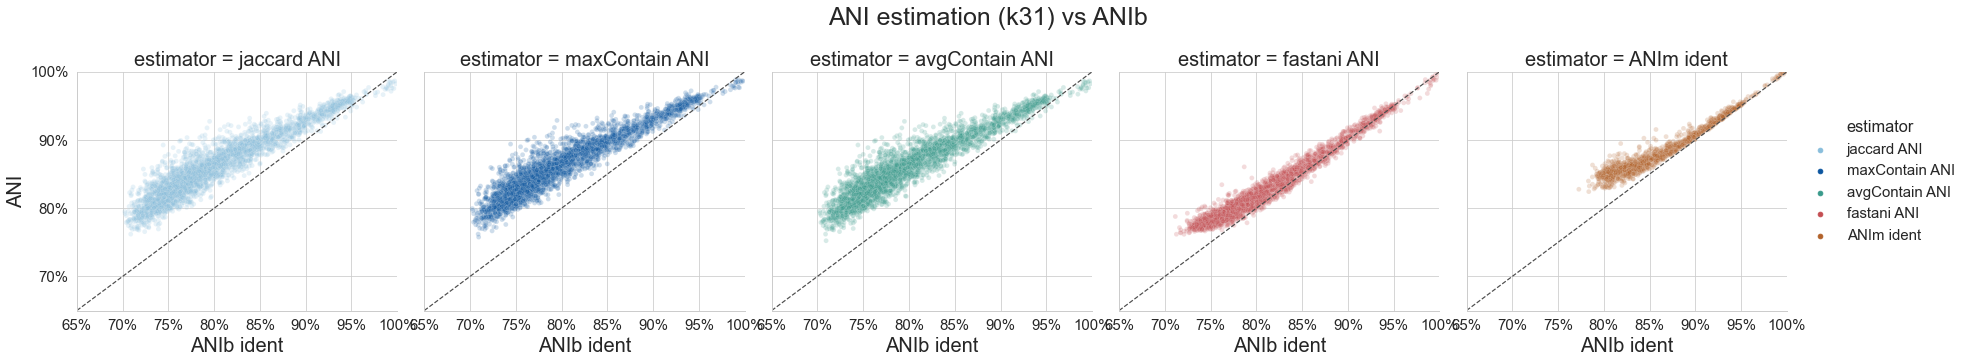

In [26]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k31_scaled1,x="ANIb ident", y="ANI", hue="estimator",col="estimator", palette=ani_colors, alpha=0.2)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #plt.xlabel("pyani ANI", size=20, labelpad=15)
    #plt.ylabel("fastani ANI", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k31) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')



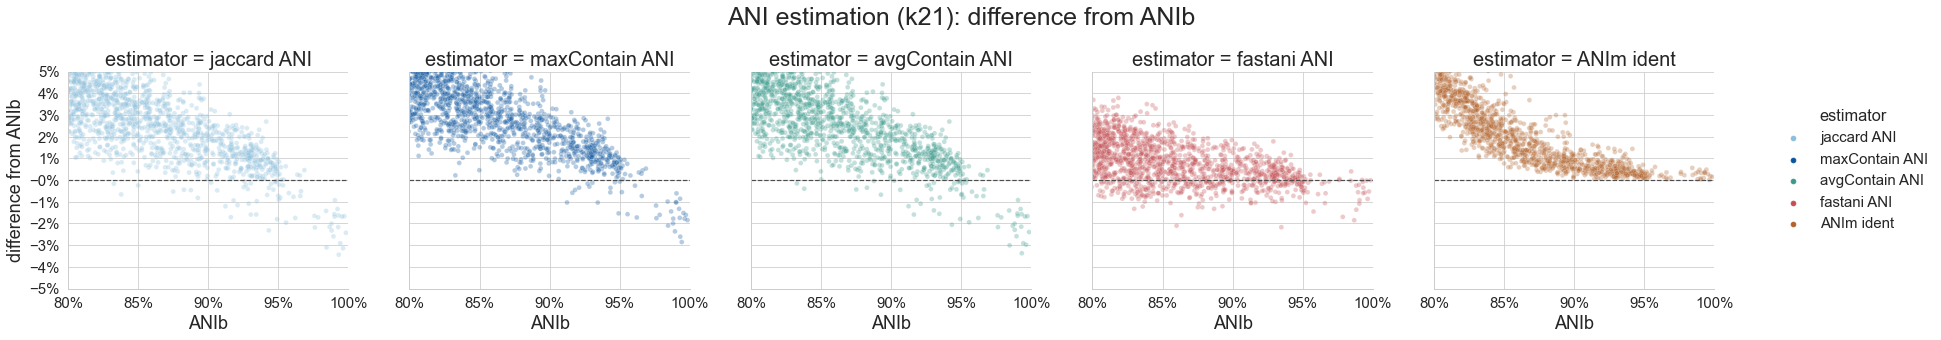

In [27]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k21_scaled1,x="ANIb ident", y="ANIdiff", hue="estimator",col="estimator", palette=ani_colors, alpha=0.3)
    g.set(xlim=(.8, 1), ylim=(-0.05, 0.05))

    for ax in g.fig.axes:
        ax.axhline(0, ls="--", c=".3")
        ax.set_xlabel("ANIb", size=18)
        ax.set_ylabel("difference from ANIb", size=18)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    g.tight_layout()
    #plt.xlabel("pyani ANI", size=20, labelpad=15)
    #plt.ylabel("difference from pyani", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21): difference from ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    fig.savefig("ANI-vs-ANIb.diff.k21.scaled1.pdf",bbox_inches='tight')
    fig.savefig("ANI-vs-ANIb.diff.k21.scaled1.png",bbox_inches='tight')

## How to compare vs ANIb?

Pearson Correlation Coefficient (r) vs Coefficient of determination (R^2)
https://towardsdatascience.com/r%C2%B2-or-r%C2%B2-when-to-use-what-4968eee68ed3

> "Unlike the Pearson correlation coefficient, the coefficient of determination measures how well the predicted values match (and not just follow) the observed values. It depends on the distance between the points and the 1:1 line (and not the best-fit line) as shown above. Closer the data to the 1:1 line, higher the coefficient of determination."

In [28]:
# pearson corr fastani vs ANIb
f_ani_vs_b = k21_scaled1[k21_scaled1["estimator"] == "fastani ANI"]
f_ani_vs_b = f_ani_vs_b.rename(columns={"ANI": "fastANI"})
pearson_corr = f_ani_vs_b[["ANIb ident", "fastANI"]].corr(method="pearson")
print(pearson_corr)

            ANIb ident   fastANI
ANIb ident    1.000000  0.982935
fastANI       0.982935  1.000000


In [29]:
f_ani_vs_b.dropna(inplace=True)
f_r2_score = r2_score(f_ani_vs_b["ANIb ident"],f_ani_vs_b["fastANI"])
print("FastANI R^2: ",f_r2_score)

FastANI R^2:  0.8432692116478488


In [30]:
# pearson corr ANIm vs ANIb
m_ani_vs_b = k21_scaled1[k21_scaled1["estimator"] == "ANIm ident"]
m_ani_vs_b = m_ani_vs_b.rename(columns={"ANI": "ANIm"})
pearson_corr = m_ani_vs_b[["ANIb ident", "ANIm"]].corr(method="pearson")
print(pearson_corr)

            ANIb ident      ANIm
ANIb ident    1.000000  0.969751
ANIm          0.969751  1.000000


In [31]:
m_ani_vs_b.dropna(inplace=True)
ANIm_r2_score = r2_score(m_ani_vs_b["ANIb ident"],m_ani_vs_b["ANIm"])
print("ANIm R^2: ", ANIm_r2_score)

ANIm R^2:  0.6676093623159689


In [32]:
# pearson corr jaccard vs ANIb
j_ani_vs_b = k21_scaled1[k21_scaled1["estimator"] == "jaccard ANI"]
j_ani_vs_b = j_ani_vs_b.rename(columns={"ANI": "Jaccard ANI"})
pearson_corr = j_ani_vs_b[["ANIb ident", "Jaccard ANI"]].corr(method="pearson")
print(pearson_corr)

             ANIb ident  Jaccard ANI
ANIb ident     1.000000     0.963122
Jaccard ANI    0.963122     1.000000


In [33]:
j_ani_vs_b.dropna(inplace=True)
j_r2_score = r2_score(j_ani_vs_b["ANIb ident"],j_ani_vs_b["Jaccard ANI"])
print("Jaccard ANI R^2: ",j_r2_score)

Jaccard ANI R^2:  0.5903350374839503


In [34]:
# pearson corr jaccard vs ANIb
mc_ani_vs_b = k21_scaled1[k21_scaled1["estimator"] == "maxContain ANI"]
mc_ani_vs_b = mc_ani_vs_b.rename(columns={"ANI": "Max Contain ANI"})
pearson_corr = mc_ani_vs_b[["ANIb ident", "Max Contain ANI"]].corr(method="pearson")
print(pearson_corr)

                 ANIb ident  Max Contain ANI
ANIb ident         1.000000         0.966126
Max Contain ANI    0.966126         1.000000


In [35]:
# pearson corr jaccard vs ANIb
ac_ani_vs_b = k21_scaled1[k21_scaled1["estimator"] == "avgContain ANI"]
ac_ani_vs_b = ac_ani_vs_b.rename(columns={"ANI": "Avg Contain ANI"})
pearson_corr = ac_ani_vs_b[["ANIb ident", "Avg Contain ANI"]].corr(method="pearson")
print(pearson_corr)

                 ANIb ident  Avg Contain ANI
ANIb ident         1.000000         0.963775
Avg Contain ANI    0.963775         1.000000


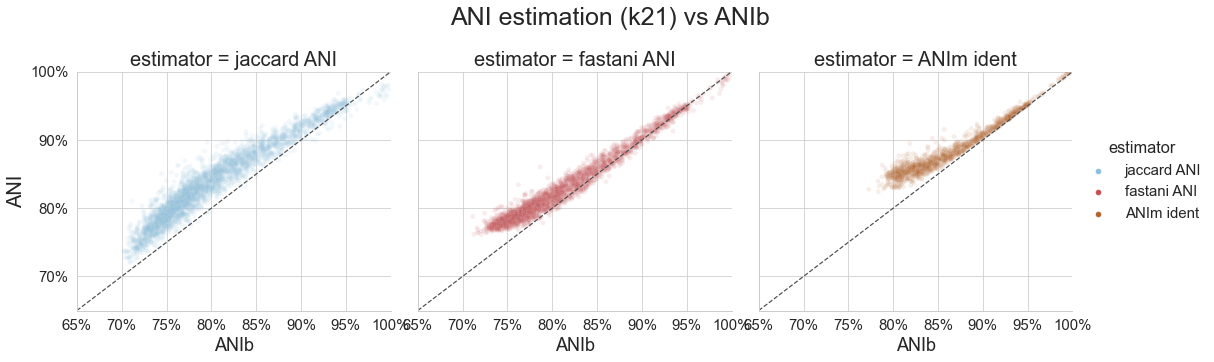

In [36]:
k21_scaled1_jaccard_only = k21_scaled1[~k21_scaled1["estimator"].isin(["maxContain ANI", "avgContain ANI"])]

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k21_scaled1_jaccard_only,x="ANIb ident", y="ANI", col = "estimator", hue="estimator", palette=ani_colors, alpha=0.1)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.set_xlabel("ANIb", size=18)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #plt.xlabel("ANIb", size=20, labelpad=15)
    plt.ylabel("estimated ANI", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')



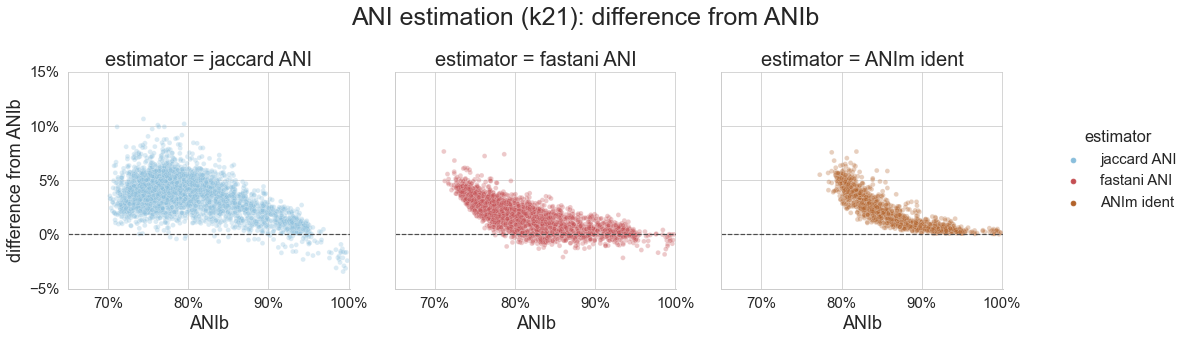

In [37]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k21_scaled1_jaccard_only,x="ANIb ident", y="ANIdiff", hue="estimator",col="estimator", palette=ani_colors, alpha=0.3)
    g.set(xlim=(.65, 1.0015), ylim=(-0.05, 0.15))

    for ax in g.fig.axes:
        ax.axhline(0, ls="--", c=".3")
        ax.set_xlabel("ANIb", size=18)
        ax.set_ylabel("difference from ANIb", size=18)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    g.tight_layout()
    #plt.xlabel("pyani ANI", size=20, labelpad=15)
    #plt.ylabel("difference from pyani", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21): difference from ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
   # fig.savefig("ANI-vs-ANIb.diff.k21.scaled1.pdf",bbox_inches='tight')
   # fig.savefig("ANI-vs-ANIb.diff.k21.scaled1.png",bbox_inches='tight')


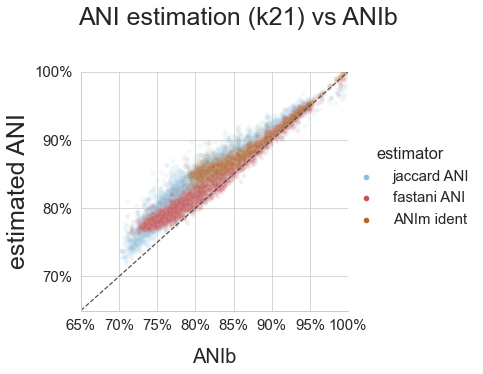

In [38]:

k21_scaled1_jaccard_only = k21_scaled1[~k21_scaled1["estimator"].isin(["maxContain ANI", "avgContain ANI"])]

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=k21_scaled1_jaccard_only,x="ANIb ident", y="ANI", hue="estimator", palette=ani_colors, alpha=0.1)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    plt.xlabel("ANIb", size=20, labelpad=15)
    plt.ylabel("estimated ANI", size=25)
    fig = g.fig
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')

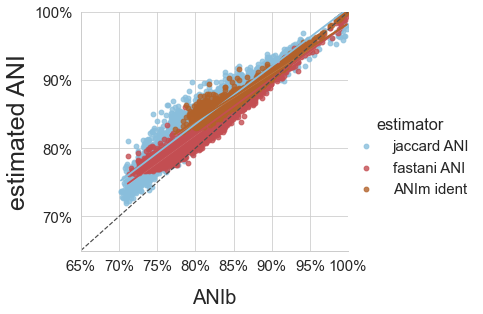

In [39]:
# linear regression
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.lmplot(data=k21_scaled1_jaccard_only,x="ANIb ident", y="ANI", hue="estimator", palette=ani_colors)#, alpha=0.1)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    plt.xlabel("ANIb", size=20, labelpad=15)
    plt.ylabel("estimated ANI", size=25)
    fig = g.fig
    #g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')

In [40]:
def annotate(df, x_col, y_col, ax, color='black', pearson=True,**kws):
    #pearson
    if pearson== True:
        r, p = sp.stats.pearsonr(df[x_col], df[y_col])
        ax.text(.25, .85, 'r={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes, fontsize="x-small", color=color)
    else:
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
        predict_y = slope * df[x_col] + intercept
        r_squared = r2_score(df[y_col], predict_y)
        line_label = f' y={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}'
        ax.text(.10, .8, line_label, transform=ax.transAxes, fontsize="x-small", color=color)
        
    # slope and R2 instead

    #L_labels = leg.get_texts()
# assuming you computed r_squared which is the coefficient of determination somewhere else
#slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df['EAV'],df['PAV'])
#label_line_1 = r'$y={0:.1f}x+{1:.1f}'.format(slope,intercept)
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    

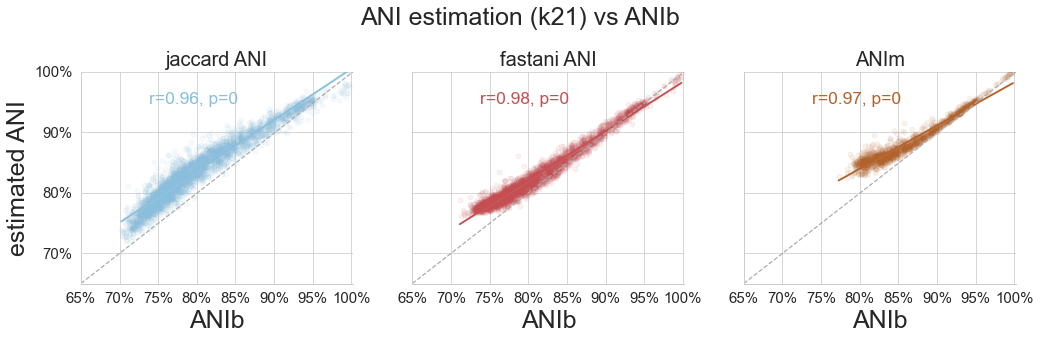

In [41]:
# linear regression
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.lmplot(data=k21_scaled1_jaccard_only,x="ANIb ident", y="ANI", hue="estimator", col="estimator", palette=ani_colors, scatter_kws={'alpha':0.07})#, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})#line_kws={'color': 'red'})
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1.002)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3", 
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.set_ylabel("", size=25)
        ax.set_xlabel("ANIb", size=25)
        title = ax.get_title()
        if "jaccard" in title:
            annotate(k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "jaccard ANI"].dropna(), "ANIb ident", "ANI", ax, color=ani_colors["jaccard ANI"])
            new_title = "jaccard ANI"
            ax.set_ylabel("estimated ANI", size=25)
        elif "fastani" in title:
            annotate(k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "fastani ANI"].dropna(), "ANIb ident", "ANI", ax, color=ani_colors["fastani ANI"])
            new_title = "fastani ANI"
        elif "ANIm" in title:
            annotate(k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "ANIm ident"].dropna(), "ANIb ident", "ANI", ax, color=ani_colors["ANIm ident"])
            new_title = "ANIm"
        ax.set_title(new_title)
    #plt.xlabel("ANIb", size=20, labelpad=15)
    #plt.ylabel("estimated ANI", size=25)
    fig = g.fig
    fig.tight_layout()
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')

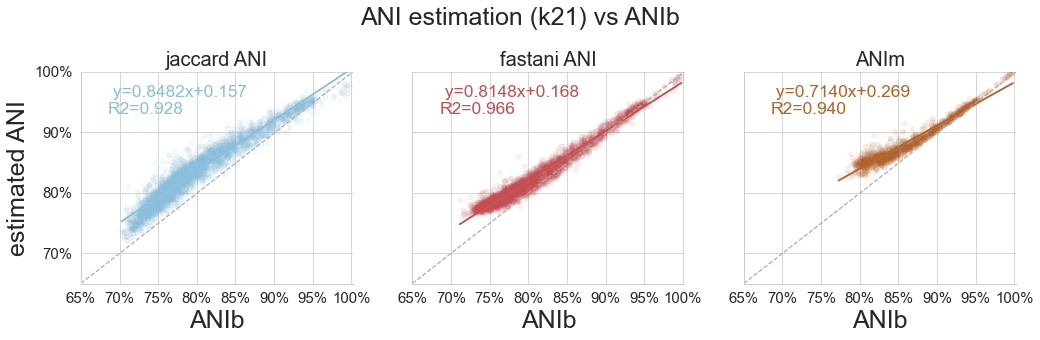

In [42]:
# linear regression
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.lmplot(data=k21_scaled1_jaccard_only,x="ANIb ident", y="ANI", hue="estimator", col="estimator", palette=ani_colors, scatter_kws={'alpha':0.07})#, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})#line_kws={'color': 'red'})
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.gcf().set_size_inches(11, 7)
    #g.set(xlim=(65, 100), ylim=(0.65, 1))
    xlim=(0.65, 1.002)#None
    ylim= (0.65, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3", 
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.set_ylabel("", size=25)
        ax.set_xlabel("ANIb", size=25)
        title = ax.get_title()
        if "jaccard" in title:
            annotate(k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "jaccard ANI"].dropna(), 
                     "ANIb ident", "ANI", ax, color=ani_colors["jaccard ANI"], pearson=False)
            new_title = "jaccard ANI"
            ax.set_ylabel("estimated ANI", size=25)
        elif "fastani" in title:
            annotate(k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "fastani ANI"].dropna(),
                     "ANIb ident", "ANI", ax, color=ani_colors["fastani ANI"], pearson=False)
            new_title = "fastani ANI"
        elif "ANIm" in title:
            annotate(k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "ANIm ident"].dropna(),
                     "ANIb ident", "ANI", ax, color=ani_colors["ANIm ident"], pearson=False)
            new_title = "ANIm"
        ax.set_title(new_title)
    #plt.xlabel("ANIb", size=20, labelpad=15)
    #plt.ylabel("estimated ANI", size=25)
    fig = g.fig
    fig.tight_layout()
    g.fig.suptitle('ANI estimation (k21) vs ANIb', fontsize=25)#, pad=20)
    plt.subplots_adjust(top=0.8) 
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.pdf",bbox_inches='tight')
    #fig.savefig("ANI-vs-ANIb.corr.k31.scaled1.png",bbox_inches='tight')

Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

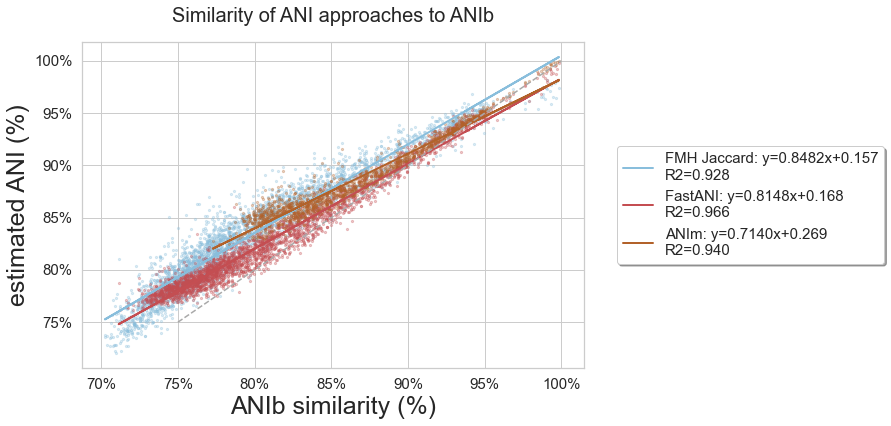

In [43]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard ANI", "fastani ANI", "ANIm ident"]
labelD = {"jaccard ANI": "FMH Jaccard", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANI"
    color = ani_colors[var]
    df = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}: y={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.75, 1)#None
ylim= (0.75, 1)
ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated ANI (%)", size=25)
ax.set_xlabel("ANIb similarity (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)






Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

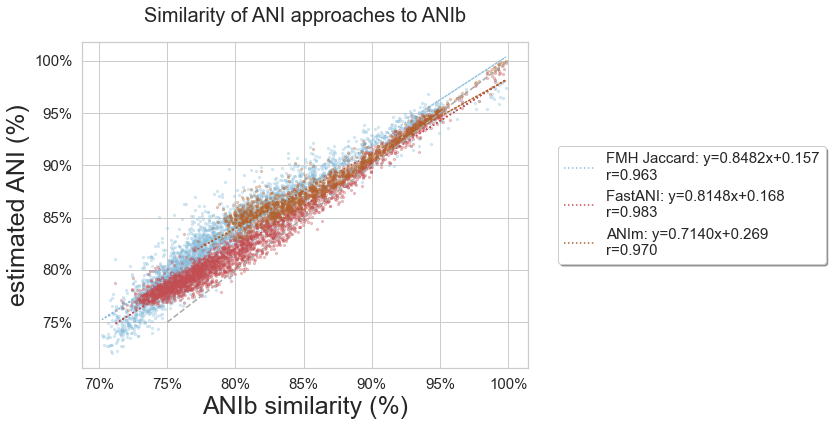

In [44]:
# do the linear regressions manually; plot all on same plot
#https://stackoverflow.com/questions/45902739/seaborn-annotate-the-linear-regression-equation
vars_of_interest = ["jaccard ANI", "fastani ANI", "ANIm ident"]
labelD = {"jaccard ANI": "FMH Jaccard", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANI"
    color = ani_colors[var]
    df = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    #r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}: y={slope:.4f}x+{intercept:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=1.5, linestyle=':')


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.75, 1)#None
ylim= (0.75, 1)
ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated ANI (%)", size=25)
ax.set_xlabel("ANIb similarity (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)



    

Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb (ANI >= 80%)')

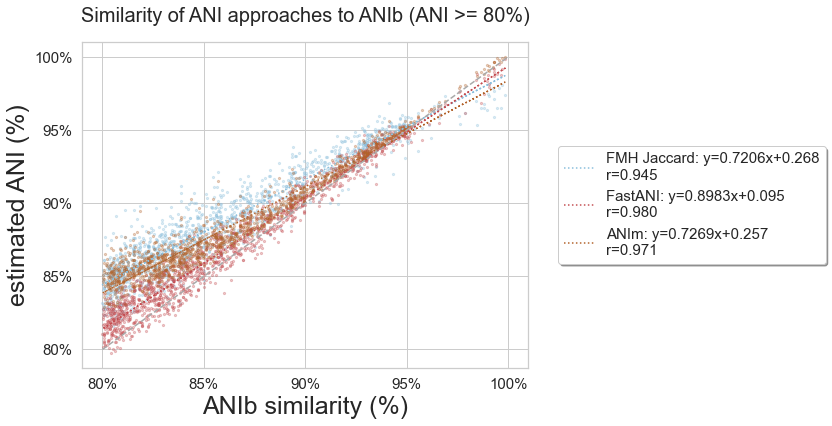

In [45]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard ANI", "fastani ANI", "ANIm ident"]
labelD = {"jaccard ANI": "FMH Jaccard", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
above_80 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.80]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANI"
    color = ani_colors[var]
    #df = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == var].dropna()
    df = above_80[above_80['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    #r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}: y={slope:.4f}x+{intercept:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=1.5, linestyle=':')


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.8, 1)#None
ylim= (0.8, 1)
ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated ANI (%)", size=25)
ax.set_xlabel("ANIb similarity (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of ANI approaches to ANIb (ANI >= 80%)", pad=20, size=20)



Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

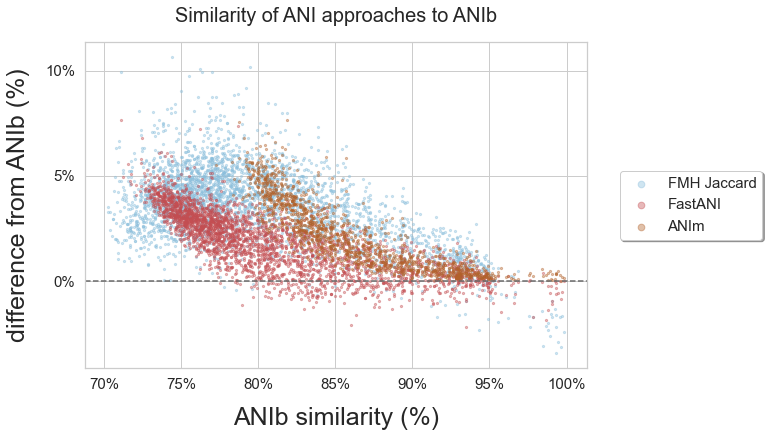

In [46]:
# plot ANIdiff on same plot
vars_of_interest = ["jaccard ANI", "fastani ANI", "ANIm ident"]
labelD = {"jaccard ANI": "FMH Jaccard", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANIdiff"
    color = ani_colors[var]
    df = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.4, marker='o', s=5,color=color, label = labelD[var])
    #slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    #predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    #r_squared = r2_score(df[y_col], predict_y)
    #line_label = f'{labelD[var]}: y={slope:.4f}x+{intercept:.3f}\nr={r_value:.3f}'
    #plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=1.5, linestyle=':')


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.75, 1)#None
ylim= (-0.05, 0.15)
plt.axhline(y=0, color='dimgrey', linestyle='--')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("difference from ANIb (%)", size=25, labelpad=15)
ax.set_xlabel("ANIb similarity (%)", size=25, labelpad=15)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15},  markerscale=3.)
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)

In [47]:
k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "jaccard ANI"].dropna()

comparison_name      path lowest_common_rank  \
0       GCA_004524385.1_x_GCA_004524535.1     path1              genus   
54      GCA_002255135.1_x_GCA_002254825.2    path10              genus   
108     GCA_000495735.1_x_GCA_002496425.1   path100              genus   
162     GCA_903935095.1_x_GCA_903860985.1  path1000              genus   
216     GCA_007129985.1_x_GCA_007695365.1  path1001              genus   
...                                   ...       ...                ...   
220806  GCA_902168135.1_x_GCF_000194605.1   path994              genus   
220860  GCA_009885545.1_x_GCA_903945495.1   path995              genus   
220914  GCA_006226555.1_x_GCA_003247185.1   path996              genus   
220968  GCA_002384725.1_x_GCA_002332715.1   path997              genus   
221076  GCA_002409405.1_x_GCF_011030385.1   path999              genus   

            anchor_name     compare_name    alpha-ksize    alphabet  ksize  \
0       GCA_004524385.1  GCA_004524535.1  nucleotide-21  nucleotide     21   
54      GCA_002255135.1  GCA_002254825.2  nucleotide-21  nucleotide     21   
108     GCA_000495735.1  GCA_002496425.1  nucleotide-21  nucleotide     21   
162     GCA_903935095.1  GCA_903860985.1  nucleotide-21  nucleotide     21   
216     GCA_007129985.1  GCA_007695365.1  nucleotide-21  nucleotide     21   
...                 ...              ...            ...         ...    ...   
220806  GCA_902168135.1  GCF_000194605.1  nucleotide-21  nucleotide     21   
220860  GCA_009885545.1  GCA_903945495.1  nucleotide-21  nucleotide     21   
220914  GCA_006226555.1  GCA_003247185.1  nucleotide-21  nucleotide     21   
220968  GCA_002384725.1  GCA_002332715.1  nucleotide-21  nucleotide     21   
221076  GCA_002409405.1  GCF_011030385.1  nucleotide-21  nucleotide     21   

        scaled  compareM AAI  ANIb ident  ANIb_coverage    estimator  \
0            1        0.9242    0.937351       0.582294  jaccard ANI   
54           1        0.9804    0.992356       0.560973  jaccard ANI   
108          1        0.6496    0.732759       0.341170  jaccard ANI   
162          1        0.9201    0.883220       0.799126  jaccard ANI   
216          1        0.8967    0.841005       0.668227  jaccard ANI   
...        ...           ...         ...            ...          ...   
220806       1        0.8096    0.763334       0.534913  jaccard ANI   
220860       1        0.7225    0.743340       0.424684  jaccard ANI   
220914       1        0.7786    0.743571       0.456452  jaccard ANI   
220968       1        0.9077    0.885838       0.547115  jaccard ANI   
221076       1        0.9137    0.856851       0.735197  jaccard ANI   

             ANI   ANIdiff  
0       0.939417  0.002066  
54      0.979037 -0.013319  
108     0.773222  0.040464  
162     0.911304  0.028084  
216     0.861021  0.020015  
...          ...       ...  
220806  0.808177  0.044843  
220860  0.778925  0.035585  
220914  0.785584  0.042013  
220968  0.897643  0.011805  
221076  0.887947  0.031097  

[3342 rows x 15 columns]

In [48]:

jdf = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "jaccard ANI"].dropna()
jdf = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['estimator'] == "jaccard ANI"].dropna()




In [53]:
k21_scaled1['estimator'].unique() 

array(['jaccard ANI', 'maxContain ANI', 'avgContain ANI', 'fastani ANI',
       'ANIm ident'], dtype=object)

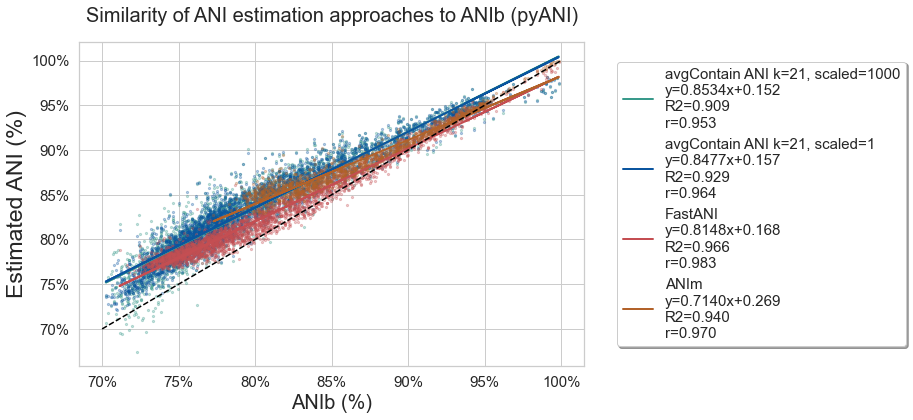

In [87]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain ANI"]#, "maxContain ANI", jaccard ANI]
mapping_vars = ["fastani ANI", "ANIm ident"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard ANI": "Jaccard", "maxContain ANI": "maxContain ANI", "avgContain ANI": "avgContain ANI", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)


#ani_colors = {"jaccard ANI":"#89bedc", "maxContain ANI":"#0b559f", 
#              "containA ANI":'#2b7bba', "fastani ANI":"#c44e52", 
#              "fastani_ident": "#c44e52", "containB ANI": "#74c476", 
#              "minContain ANI": "#006400", 'pyani_ident': "#A3623A", 
#              "avgContain ANI": "#399a8b", "ANIm ident": "#4E0707"}

ani_colors = {"jaccard ANI":"#89bedc", "maxContain ANI":"#0b559f",
              "containA ANI":'#2b7bba', "compareM ANI":"#c44e52",
              "fastani ANI": "#c44e52", "containB ANI": "#74c476",
              "minContain ANI": "#006400", 'ANIb ident': "#A3623A",
              "avgContain ANI": "#89bedc", 'ANIm ident': "#B2622A",}

colorD = ["#399a8b","#0b559f"]

dfs= [k21_scaled1000,k21_scaled1]
param_labels = ["k=21, scaled=1000","k=21, scaled=1"]
alphaD = [0.3, 0.3]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["ANIdiff"])
    for var in kmer_vars:
        x_col = "ANIb ident"
        y_col = "ANI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "ANIb ident"
    y_col = "ANI"
    color = ani_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.7, 1)#None
ylim= (0.7, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated ANI (%)", size=23)
ax.set_xlabel("ANIb (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of ANI estimation approaches to ANIb (pyANI)", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.ANIcompare.k21.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.ANIcompare.k21.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

## k51

This is not the right dataset for >=95% ANI comparisons!
Do all species groups, gtdb. Start with 3 groups from ANI != paper.

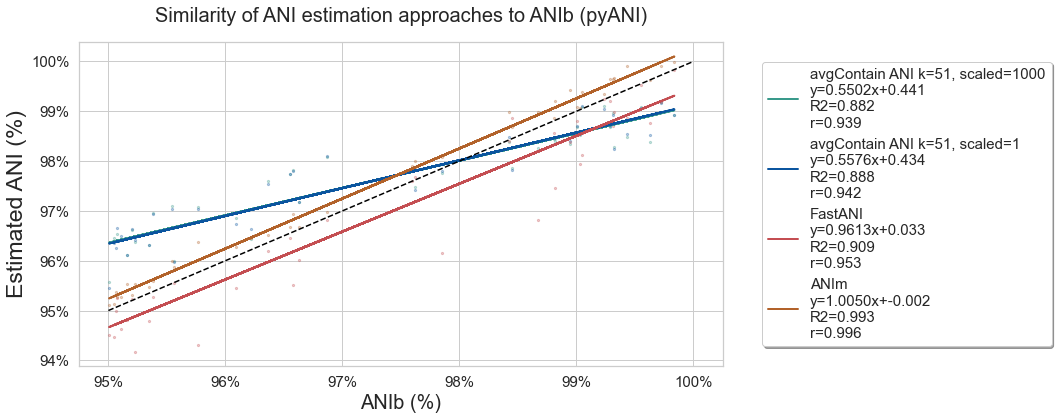

In [76]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain ANI"]#, "maxContain ANI", jaccard ANI]
mapping_vars = ["fastani ANI", "ANIm ident"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard ANI": "Jaccard", "maxContain ANI": "maxContain ANI", "avgContain ANI": "avgContain ANI", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


#ani_colors = {"jaccard ANI":"#89bedc", "maxContain ANI":"#0b559f", 
#              "containA ANI":'#2b7bba', "fastani ANI":"#c44e52", 
#              "fastani_ident": "#c44e52", "containB ANI": "#74c476", 
#              "minContain ANI": "#006400", 'pyani_ident': "#A3623A", 
#              "avgContain ANI": "#399a8b", "ANIm ident": "#4E0707"}

ani_colors = {"jaccard ANI":"#89bedc", "maxContain ANI":"#0b559f",
              "containA ANI":'#2b7bba', "compareM ANI":"#c44e52",
              "fastani ANI": "#c44e52", "containB ANI": "#74c476",
              "minContain ANI": "#006400", 'ANIb ident': "#A3623A",
              "avgContain ANI": "#399a8b", 'ANIm ident': "#B2622A",}

colorD = ["#399a8b","#0b559f"]

dfs= [k51_scaled1000,k51_scaled1]
param_labels = ["k=51, scaled=1000","k=51, scaled=1"]
alphaD = [0.3, 0.3]
linewidthD = [2, 2]

for n, df in enumerate(dfs):
    df = dfs[n]
    df = df.drop(columns= ["ANIdiff"])
    for var in kmer_vars:
        x_col = "ANIb ident"
        y_col = "ANI"
        #color = aai_colors[var]
        color = colorD[n]
        var_df = df[df['estimator'] == var].dropna()
        var_df = var_df[var_df["ANIb ident"] >= 0.95]
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "ANIb ident"
    y_col = "ANI"
    color = ani_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    # subset to >= 95% similarity
    var_df = var_df[var_df["ANIb ident"] >= 0.95]
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.95, 1)#None
ylim= (0.95, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated ANI (%)", size=23)
ax.set_xlabel("ANIb (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of ANI estimation approaches to ANIb (pyANI)", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.ANIcompare.k51.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.ANIcompare.k51.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

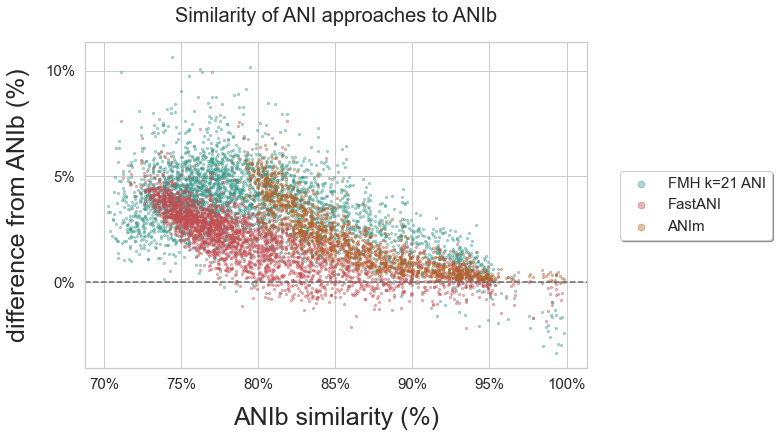

In [86]:
# plot ANIdiff on same plot
vars_of_interest = ["avgContain ANI", "fastani ANI", "ANIm ident"]
labelD = {"avgContain ANI": "FMH k=21 ANI", "fastani ANI": "FastANI", "ANIm ident": "ANIm"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANIdiff"
    color = ani_colors[var]
    df = k21_scaled1[k21_scaled1['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.4, marker='o', s=5,color=color, label = labelD[var])    
    
xlim=(0.75, 1)#None
ylim= (-0.05, 0.15)
plt.axhline(y=0, color='dimgrey', linestyle='--')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("difference from ANIb (%)", size=25, labelpad=15)
ax.set_xlabel("ANIb similarity (%)", size=25, labelpad=15)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15},  markerscale=3.)
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)

Text(0.5, 1.0, 'Similarity of ANI approaches to ANIb')

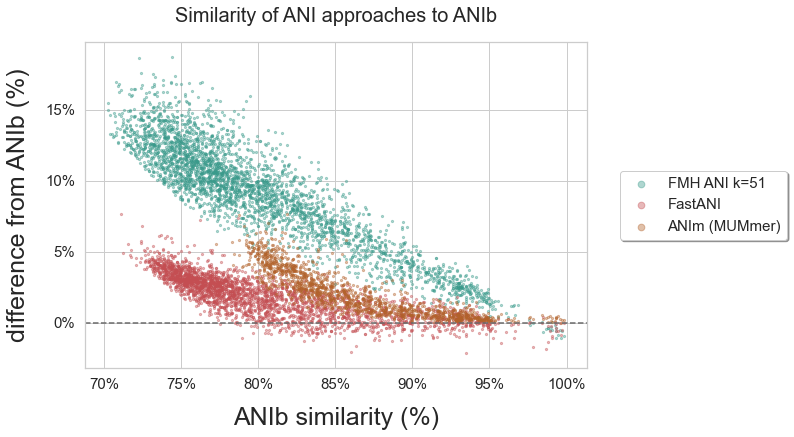

In [83]:
# plot ANIdiff on same plot - k51
vars_of_interest = ["avgContain ANI", "fastani ANI", "ANIm ident"]
labelD = {"avgContain ANI": "FMH ANI k=51", "fastani ANI": "FastANI", "ANIm ident": "ANIm (MUMmer)"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANIdiff"
    color = ani_colors[var]
    df = k51_scaled1[k51_scaled1['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.4, marker='o', s=5,color=color, label = labelD[var])    
    
xlim=(0.75, 1)#None
ylim= (-0.05, 0.15)
plt.axhline(y=0, color='dimgrey', linestyle='--')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("difference from ANIb (%)", size=25, labelpad=15)
ax.set_xlabel("ANIb similarity (%)", size=25, labelpad=15)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15},  markerscale=3.)
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)

In [ ]:
# plot ANIdiff on same plot - k51
vars_of_interest = ["avgContain ANI", "fastani ANI", "ANIm ident"]
labelD = {"avgContain ANI": "FMH ANI", "fastani ANI": "FastANI", "ANIm ident": "ANIm (MUMmer)"}
sns.set_style("whitegrid")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

#fig, ax = plt.subplots()
#above_75 = k21_scaled1_jaccard_only[k21_scaled1_jaccard_only['ANIb ident'] >= 0.75]

for var in vars_of_interest:
    x_col = "ANIb ident"
    y_col = "ANIdiff"
    color = ani_colors[var]
    df = k51_scaled1[k51_scaled1['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.4, marker='o', s=5,color=color, label = labelD[var])    
    
xlim=(0.75, 1)#None
ylim= (-0.05, 0.15)
plt.axhline(y=0, color='dimgrey', linestyle='--')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("difference from ANIb (%)", size=25, labelpad=15)
ax.set_xlabel("ANIb similarity (%)", size=25, labelpad=15)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15},  markerscale=3.)
plt.title("Similarity of ANI approaches to ANIb", pad=20, size=20)